In [2]:
# This package for analysis
#sklearn is a mechine learning in package which contains features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.
import numpy as np
import pandas as pd
from sklearn import svm

In [3]:
#packages for visualising
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale = 1.2)

In [4]:
%matplotlib inline

In [5]:
#Python pickle module is used for serializing and de-serializing a Python object structure. ... Pickling is a way to convert a python object (list, dict, etc.) into a character stream. 
import pickle

In [6]:
recipes = pd.read_csv('/Users/thejaastro/Desktop/Cupcakes vs Muffins.csv')
print(recipes.head())

     Type  Flour  Milk  Suger  Butter  Egg  Baking Powder  Salt  Vanilla
0  Muffin     55    28      3       7    5              2     0        0
1  Muffin     47    24     12       6    9              1     0        0
2  Muffin     47    23     18       6    4              1     0        0
3  Muffin     45    11     17      17    8              1     0        0
4  Muffin     50    25     12       6    5              2     1        0


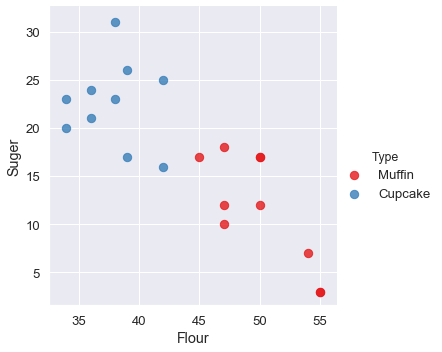

In [16]:
#plot our data
#Hues This is the 90s and your terminal can display _16_ glorious colors.
#palette choose colour patran
sns.lmplot('Flour', 'Suger', data = recipes, hue='Type',
          palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [8]:
#format or pre-process our data.
#tolist converts array into list of strings
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1) # trianing data
recipe_feature = recipes.columns.values[1:].tolist()
recipe_feature
ingredients = recipes[['Flour','Suger']].values
print(ingredients)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [9]:
#svc support vector classifier  yes no, true flase
#svr support vector regression actual value 
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
# get the separting hyperplane
#math behind prediction and train
w = model.coef_[0] 
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a*xx - model.intercept_[0]/w[1]

#supporting vectors calculation

b = model.support_vectors_[0]
yy_down = a*xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a*xx + (b[1] - a * b[0]) 

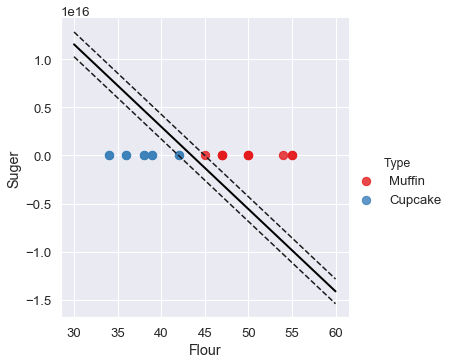

In [11]:
sns.lmplot('Flour',  'Suger', data = recipes, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s": 70})
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [12]:
def Cupcake_or_muffin(flour, suger):
    if(model.predict([[flour, suger]]))==0:
        print('You\' looking at a muffin recipe!')
    else:
        print('You\' looking at a cupcake recipe!')

Cupcake_or_muffin(50,60)

You' looking at a muffin recipe!


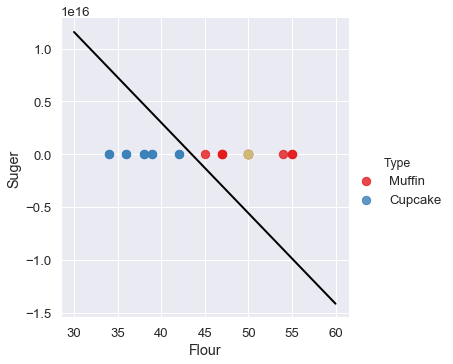

In [13]:
sns.lmplot('Flour',  'Suger', data = recipes, hue = 'Type', palette = 'Set1', fit_reg = False, scatter_kws = {"s": 70})
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(50, 60, 'yo', markersize = '9')